<a href="https://colab.research.google.com/github/ItighneS/DLM_LSTM/blob/main/Group_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCK PRICE PREDICTION USING LSTM

###Anjala 055055 | Itighne Sinha 055015

#OBJECTIVE

The objective of this project is to develop a Long Short-Term Memory (LSTM) based deep learning model to predict the stock prices of NIFTY 50 and QuessCorp Limited using historical daily stock market data. The model aims to provide insights into the movement of these stock prices and analyze the extent to which Nifty50 stock index correlated with QuessCorp's stock price.

#PROBLEM STATEMENT

The primary challenge addressed is predicting stock prices using time series data, which involves capturing intricate patterns and trends. Furthermore, this project assesses how fluctuations in the Nifty 50 index affects a stock like Quess Corp Limited.
- Can we accurately predict future stock prices using historical data?
- What is the degree of correlation between NIFTY 50 and Reliance Industries stock movements?
- How well does the LSTM model capture stock market trends compared to actual market fluctuations?

#Dataset Preparation

- Data Source: Yahoo Finance (yfinance package) was used to fetch historical stock price data for:
  - Nifty 50 Index: Ticker ^NSEI (National Stock Exchange Index)
  -	Reliance Industries: Ticker RELIANCE.NS
- Date Range: Data is taken from the last 730d period, with a 1 hour interval.

- Data Operations:
  -	Only the closing prices were extracted, as they provide a reliable summary of the stock’s performance on a given day.
  -	This data was stored in a Pandas DataFrame and normalized using MinMaxScaler to scale values between 0 and 1, making the model more efficient in training.
  - The dataset was then split for training and testing.
  - This was done for both Nifty50 and QuessCorp datasets.
  - Although we have only trained the model on the Nifty50 Index data, it was necessary to split the QuessCorp stock data as well to avoid errors.


#Model Architecture

First Model

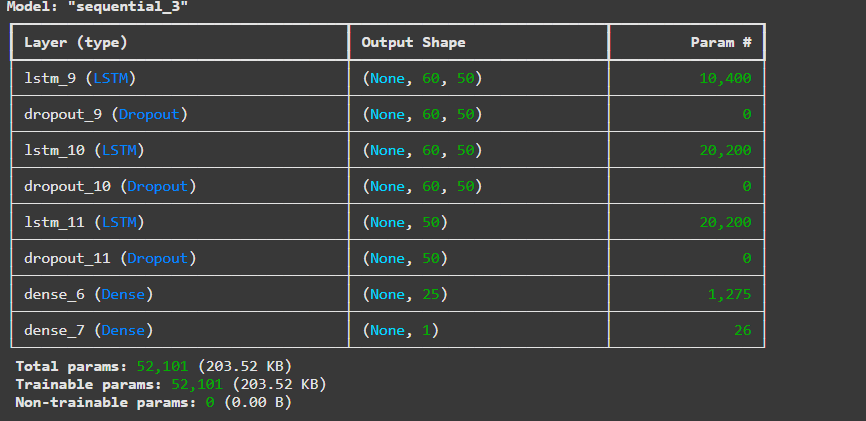

Tuned Model

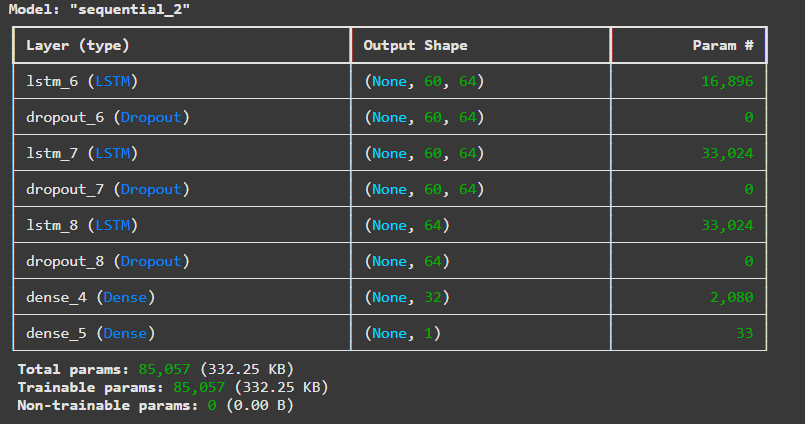

#Notes and Observations

1. We trained and validated both of our models on the Nifty50 Data, and then used the same models on QuessCorp dataset to predict stock prices.\

2. Instead of the pre existing accuracy metrics, we have created one of our own i.e. Mean Absolute Percentage Error (MAPE).

3. Using this metric, the accuracy while training te first model is 99.04% whereas for the tuned model it is 97.59%.

4. Every epoch takes about 20 seconds per average to run.

5. On testing with QuessCorp Stock Prices, the first model gives an accuracy of 97.94% while the second model is 97.59% accurate.

6. We have also calculated the correlation between the NIfty50 Stock Index and QuessCorp Stock Prices -
  - Correlation on actual data is 0.56
  - Correaltion on predicted data is .79






#Inferences

1. Model Generalization Across Stocks:

  - Both models were trained on Nifty50 data but performed well on QuessCorp, indicating that LSTM can capture generalized market trends.The difference in accuracy between training and testing suggests some degree of overfitting to the Nifty50 dataset.

2. Impact of Hyperparameter Tuning:

  - The first model (baseline) achieved 99.04% training accuracy, whereas the tuned model achieved 97.59%. This slight accuracy drop suggests that tuning introduced more regularization (e.g., increased dropout), preventing overfitting.

  - However, the tuned model’s performance on QuessCorp remains similar (97.59% vs. 97.94%), implying that further tuning might not always lead to significant improvement.

3. Execution Time vs. Model Complexity:

  - Each epoch takes ~20 seconds, which is reasonable, but real-time stock prediction may require optimization, such as reducing LSTM layers or batch size tuning.

4. Correlation Insights:

  - The actual stock prices correlation (0.56) suggests a moderate relationship between Nifty50 and QuessCorp stock prices.

  - The predicted stock prices correlation (0.79) indicates that the model amplifies this relationship, possibly due to learned dependencies from the Nifty50 dataset.

  - This implies that LSTMs might be biased toward general market movements, which can be beneficial but also risky for stock-specific forecasts.

#Managerial Insights

1. The high accuracy of 97.59%-97.94% on QuessCorp stock shows that deep learning models can be valuable for investment strategies and risk assessment.

2. Investors and portfolio managers can use these predictions to identify trends and optimize buy/sell decisions.

3. Traders should not rely solely on index movements but also analyze company-specific factors (earnings, management decisions, sector performance).

4.  For companies like QuessCorp, industry-specific variables (e.g., staffing demand, economic cycles, hiring trends) should be included in the dataset.

#ANALYSIS

## Nifty50

In [ ]:
!pip install yfinance tensorflow mape

ERROR: Could not find a version that satisfies the requirement mape (from versions: none)
ERROR: No matching distribution found for mape


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Download NIFTY 50 data (last 20 years)
nifty_data = yf.download('^NSEI', period = '730d', interval = '1h')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Extract closing prices
data = nifty_data[['Close']]

In [5]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [21]:
#show data
data.head()

Price,Close
Ticker,^NSEI
Datetime,
2022-04-19 03:45:00+00:00,17194.099609
2022-04-19 04:45:00+00:00,17194.000000
2022-04-19 05:45:00+00:00,17238.199219
2022-04-19 06:45:00+00:00,17181.500000
2022-04-19 07:45:00+00:00,17245.400391


In [8]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [9]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [10]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [60]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [14]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nifty):
    y_true, y_pred_nifty = np.array(y_true), np.array(y_pred_nifty)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nifty[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [15]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [16]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0390 - mae: 0.1216Epoch 1: Loss = 0.0129, Val Loss = 0.0020, MAE = 0.0634, Val MAE = 0.0394
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - loss: 0.0388 - mae: 0.1212 - val_loss: 0.0020 - val_mae: 0.0394
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0019 - mae: 0.0318Epoch 2: Loss = 0.0017, Val Loss = 0.0014, MAE = 0.0303, Val MAE = 0.0304
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - loss: 0.0019 - mae: 0.0317 - val_loss: 0.0014 - val_mae: 0.0304
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0019 - mae: 0.0311Epoch 3: Loss = 0.0017, Val Loss = 0.0009, MAE = 0.0291, Val MAE = 0.0254
126/126 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - loss: 0.0019 - mae: 0.0311 - val_loss: 9.2723e-04 - val_mae: 0.0254
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0014 - mae: 0.0272Epoch 4: Loss = 0.0013, Val Loss = 0.0017, MAE = 0.0260, Val MAE = 0.0359
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - l

In [23]:
model.save('LSTMNifty.keras')

In [24]:
# Predict on test data
y_pred_nifty = model.predict(X_test)
y_pred_nifty = scaler.inverse_transform(y_pred_nifty.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [25]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_nifty)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 99.07%


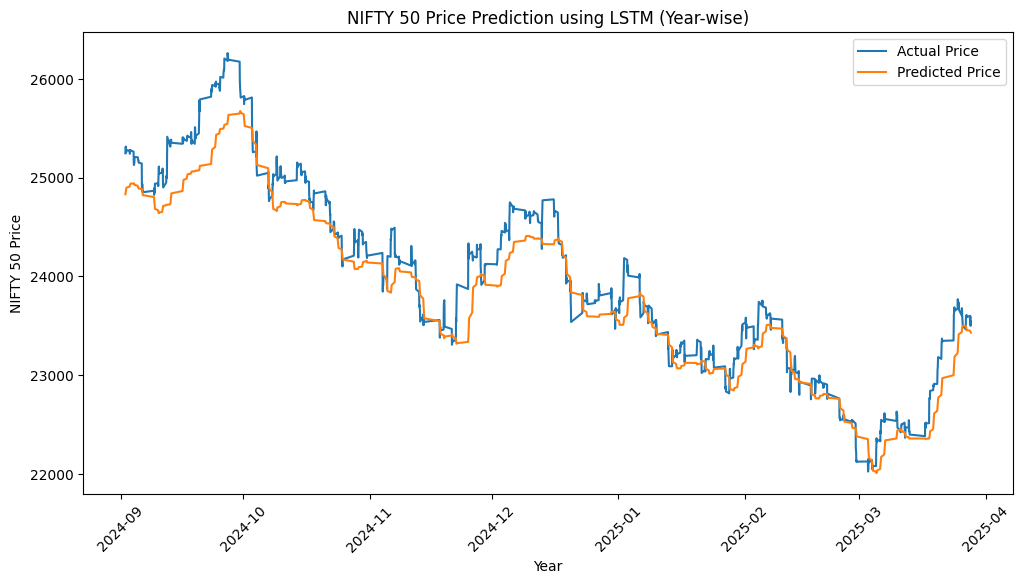

In [26]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(nifty_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(nifty_data.index[split+time_step+1:], y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

##QuessCorp

[*********************100%***********************]  1 of 1 completed


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
Final Model Accuracy: 97.94%


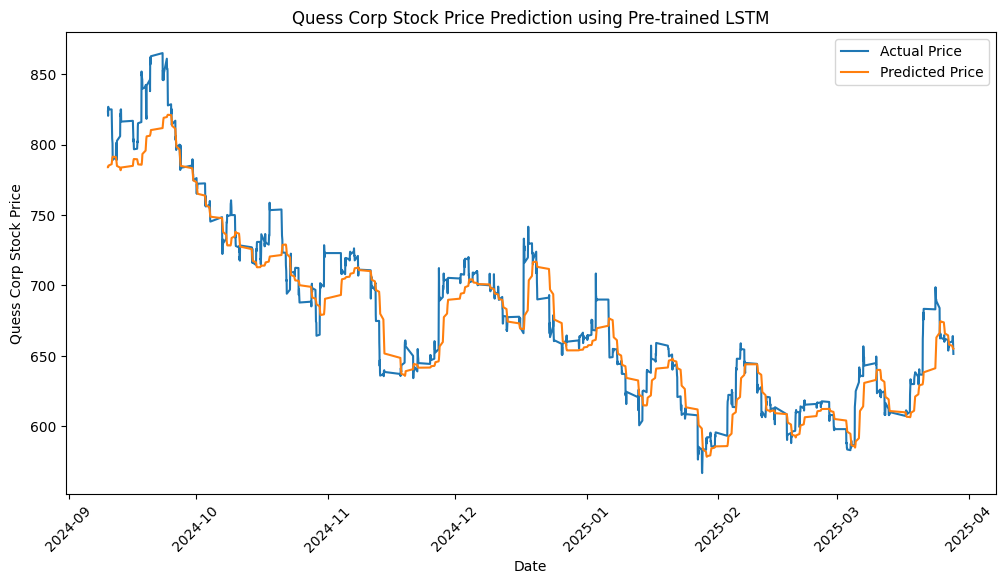

In [51]:
import numpy as np
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Download QuessCorp Industries stock data (last 2 years)
quess_data = yf.download('QUESS.NS', period='730d', interval='1h')

# Extract closing prices
data = quess_data[['Close']]

# Step 1: Split Data Before Normalization
split_ratio = 0.8
split = int(len(data) * split_ratio)

train_data = data.iloc[:split]  # Training data
test_data = data.iloc[split:]   # Testing data

# Step 2: Normalize only on training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])  # Transform test data

# Step 3: Prepare sequences using test data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X_testQ, y_testQ = create_sequences(test_scaled, time_step)

# Reshape for LSTM input
X_testQ = X_testQ.reshape((X_testQ.shape[0], X_testQ.shape[1], 1))

# Load pre-trained model
model = load_model('LSTMNifty.keras')

# Predict on the test set
y_pred_quess = model.predict(X_testQ)
y_pred_quess = scaler.inverse_transform(y_pred_quess.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_testQ.reshape(-1, 1))  # Correct inverse transform

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_quess)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test_data.index[time_step+1:], y_test_actual, label='Actual Price')
plt.plot(test_data.index[time_step+1:], y_pred_quess, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Quess Corp Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('Quess Corp Stock Price Prediction using Pre-trained LSTM')
plt.show()


##Nifty 50 vs Quess Corp (Original Price Comparison)

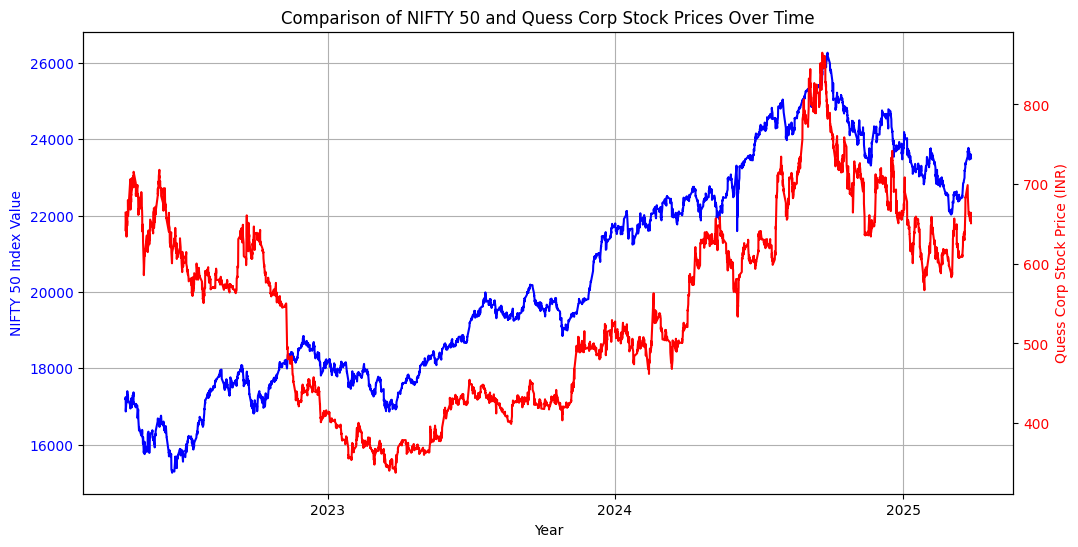

In [33]:
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
common_dates = nifty_data.index.intersection(quess_data.index)
nifty_common = nifty_data.loc[common_dates]['Close']
quess_common = quess_data.loc[common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(common_dates, nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for quess stock
ax2 = ax1.twinx()
ax2.plot(common_dates, quess_common, label='Quess Corp Stock Price', color='red')
ax2.set_ylabel('Quess Corp Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and Quess Corp Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()

##Nifty 50 vs Quess Corp (Predicted Price Comparison)

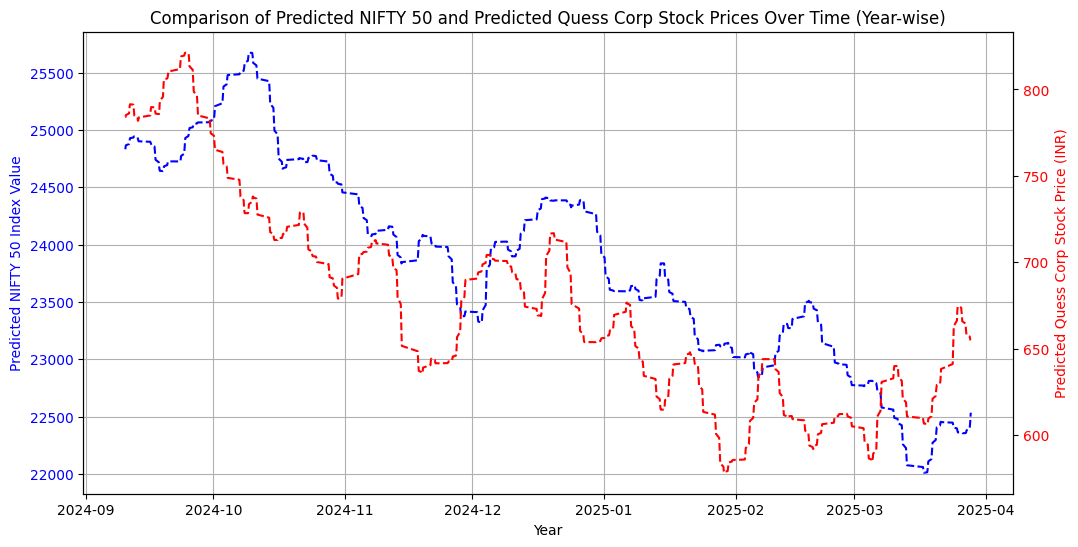

In [34]:
# Ensure both datasets have the same timeframe
common_dates = nifty_data.index[split+time_step+1:].intersection(quess_data.index[split+time_step+1:])
common_indices = np.where(quess_data.index[split+time_step+1:].isin(common_dates))[0]  # Get index positions

# Extract common prediction values using indices
y_pred_nifty_common = y_pred_nifty[common_indices]
y_pred_quess_common = y_pred_quess[common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(common_dates, y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted Quess stock
ax2 = ax1.twinx()
ax2.plot(common_dates, y_pred_quess_common, label='Predicted Quess Corp Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted Quess Corp Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted Quess Corp Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Show plot
plt.show()


In [45]:
merged = pd.merge(nifty_data['Close'], quess_data['Close'], left_index=True, right_index=True, suffixes=('_nifty', '_quess'))
# Calculate Pearson correlation
correlation = merged['^NSEI'].corr(merged['QUESS.NS'])
print(f"Correlation between actual Nifty50 score and Quess Stock Price: {correlation:.4f}")


Correlation between actual Nifty50 score and Quess Stock Price: 0.5626


In [36]:
# Calculate correlation using NumPy's corrcoef function
correlation = np.corrcoef(y_pred_nifty_common.flatten(), y_pred_quess_common.flatten())[0, 1]

print(f"Correlation between predicted Nifty50 and Quess Stock prices: {correlation:.2f}")

Correlation between predicted Nifty50 and Quess Stock prices: 0.79


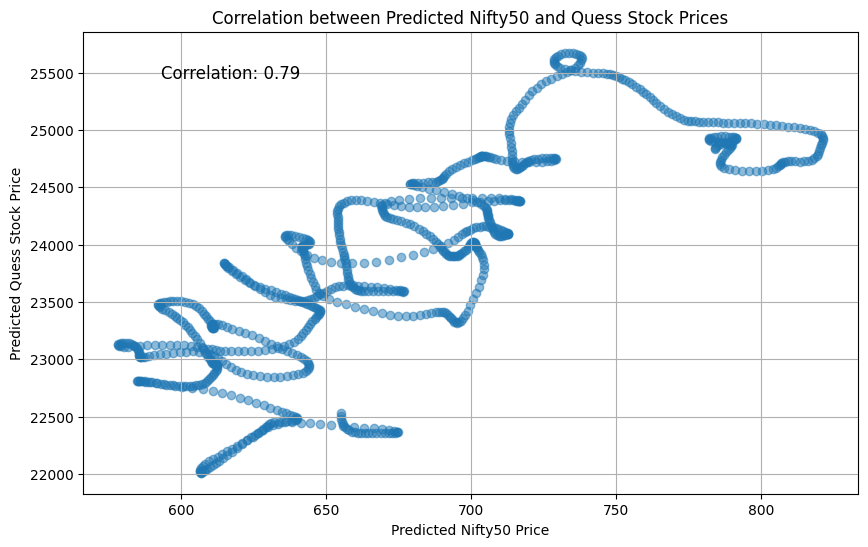

In [38]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_quess_common, y_pred_nifty_common, alpha=0.5)  # alpha for transparency
plt.title('Correlation between Predicted Nifty50 and Quess Stock Prices')
plt.xlabel('Predicted Nifty50 Price')
plt.ylabel('Predicted Quess Stock Price')

# Add correlation coefficient to the plot
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.grid(True)
plt.show()

##HYPERPARAMETRIC TUNING


##Tuned Model

In [49]:
tuned_model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)),  # More units
    Dropout(0.3),  # Increased dropout
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=64),  # Increased units
    Dropout(0.3),
    Dense(units=32, activation='relu'),  # More neurons in Dense layer
    Dense(units=1)  # Output layer
])

tuned_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Summary of the model
tuned_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train the model and store training history
history = tuned_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0047 - mae: 0.0509Epoch 1: Loss = 0.0037, Val Loss = 0.0049, MAE = 0.0444, Val MAE = 0.0600
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - loss: 0.0047 - mae: 0.0509 - val_loss: 0.0049 - val_mae: 0.0600
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0025 - mae: 0.0353Epoch 2: Loss = 0.0024, Val Loss = 0.0027, MAE = 0.0350, Val MAE = 0.0407
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - loss: 0.0025 - mae: 0.0353 - val_loss: 0.0027 - val_mae: 0.0407
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0026 - mae: 0.0361Epoch 3: Loss = 0.0022, Val Loss = 0.0017, MAE = 0.0335, Val MAE = 0.0329
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - loss: 0.0026 - mae: 0.0361 - val_loss: 0.0017 - val_mae: 0.0329
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0017 - mae: 0.0290Epoch 4: Loss = 0.0017, Val Loss = 0.0019, MAE = 0.0287, Val MAE = 0.0354
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - 

In [61]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual_tuned, y_pred_nifty_tuned)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 97.59%


In [53]:
tuned_model.save('LSTMTuned.keras')

##Tuned Nifty50


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Final Model Accuracy: 97.59%


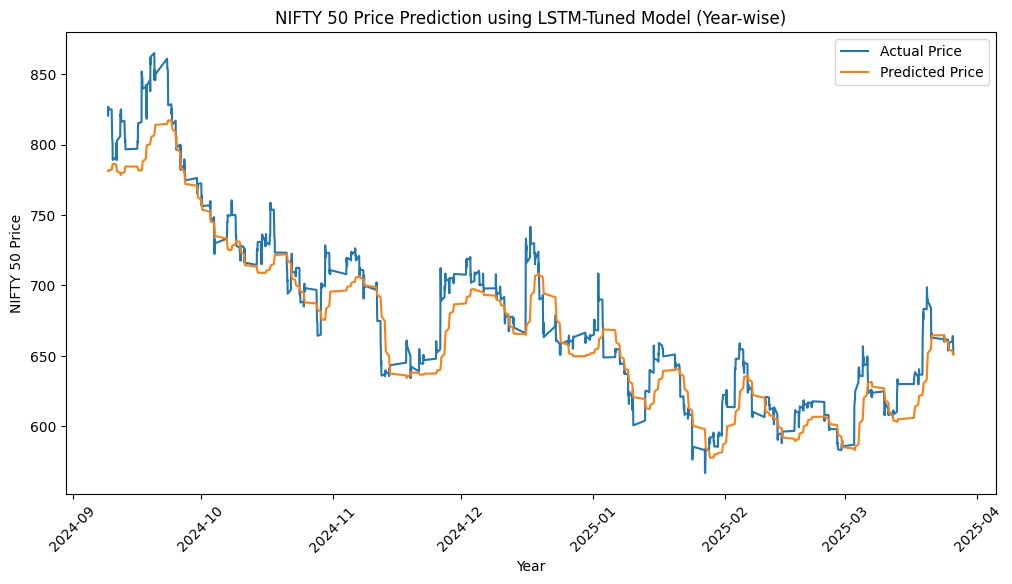

In [58]:
# Predict on test data
y_pred_nifty_tuned = tuned_model.predict(X_test)
y_pred_nifty_tuned = scaler.inverse_transform(y_pred_nifty_tuned.reshape(-1, 1))
y_test_actual_tuned = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual_tuned, y_pred_nifty_tuned)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
# Adjust the x-axis data to match the length of y_test_actual_tuned
plt.plot(nifty_data.index[split + time_step + 1:split + time_step + 1 + len(y_test_actual_tuned)], y_test_actual_tuned, label='Actual Price')
plt.plot(nifty_data.index[split + time_step + 1:split + time_step + 1 + len(y_pred_nifty_tuned)], y_pred_nifty_tuned, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM-Tuned Model (Year-wise)')
plt.show()

##Tuned QuessCorp

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Final Tuned Model Accuracy: 97.59%


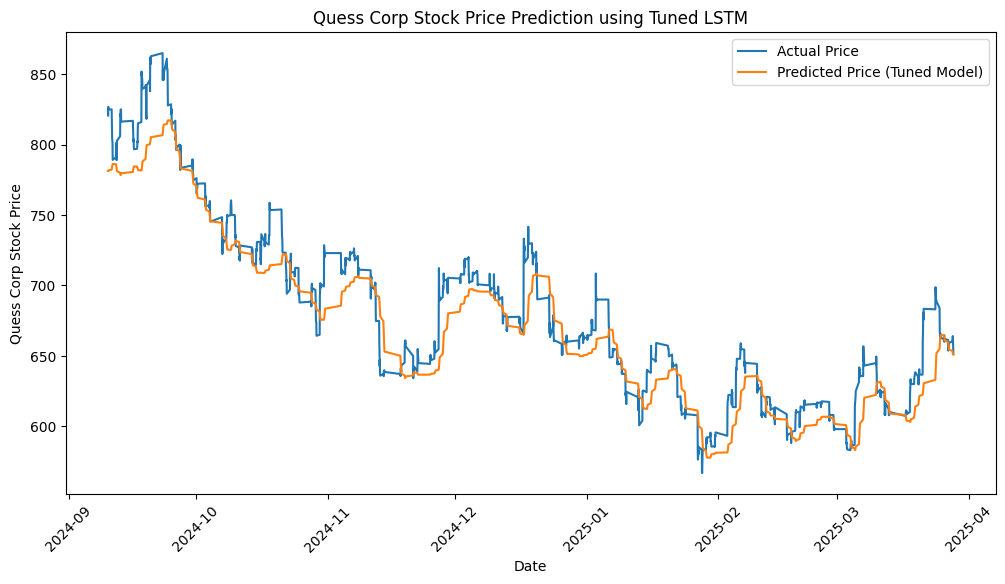

In [59]:
# Predict on the test set using the tuned model
y_pred_quess_tuned = tuned_model.predict(X_testQ)
y_pred_quess_tuned = scaler.inverse_transform(y_pred_quess_tuned.reshape(-1, 1))
y_test_actual_tuned = scaler.inverse_transform(y_testQ.reshape(-1, 1))  # Correct inverse transform

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Calculate accuracy using MAPE
accuracy_tuned = 100 - mape(y_test_actual_tuned, y_pred_quess_tuned)
print(f"Final Tuned Model Accuracy: {accuracy_tuned:.2f}%")

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test_data.index[time_step+1:], y_test_actual_tuned, label='Actual Price')
plt.plot(test_data.index[time_step+1:], y_pred_quess_tuned, label='Predicted Price (Tuned Model)')
plt.xlabel('Date')
plt.ylabel('Quess Corp Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('Quess Corp Stock Price Prediction using Tuned LSTM')
plt.show()
